# Testing with images inside each machine folder now



In [63]:
import itk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import torch
from torch.utils.data import Dataset, DataLoader
import shutil
from os import listdir
from os.path import isfile, join, isdir

import pydicom as dicom
import cv2

In [4]:
path = "/Users/schama/Downloads/rsna-breast-cancer-detection/"

In [5]:
data = pd.read_csv(path+"train.csv")

In [6]:
# specify your image path
image_path = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/"

In [15]:
# testing machine 21
ds = dicom.dcmread(image_path+"21/8076716.dcm")

In [16]:
ds.file_meta.TransferSyntaxUID.name

'JPEG 2000 Image Compression (Lossless Only)'

In [22]:
type(ds)

pydicom.dataset.FileDataset

In [23]:
type(meta)

pydicom.dataset.FileDataset

In [18]:
pixel_array_numpy = ds.pixel_array

In [19]:
pixel_array_numpy.shape

(2776, 2082)

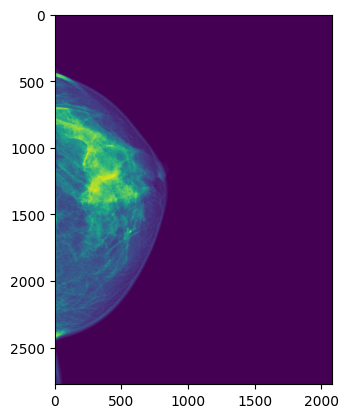

In [20]:
imgplot = plt.imshow(pixel_array_numpy)

In [21]:
# same output as just printing the dile after reading with dcmread!
meta = dicom.read_file(image_path+"21/262802.dcm")

In [73]:
# function to read a bunch of images and get some info about all of them
def get_info(path):
    image = []
    patient = []
    rows = []
    column = []
    image_type = []
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for file in files:
        ds = dicom.dcmread(join(path,file))
        image.append(ds.InstanceNumber)
        patient.append(ds.PatientID)
        rows.append(ds.Rows)
        column.append(ds.Columns)
        image_type.append(ds.file_meta.TransferSyntaxUID.name)
    output= {'image_id': image,
             'patient)id': patient,
             'row': rows,
             'column': column,
             'image_type': image_type
             }
    df = pd.DataFrame(output)
    return df

In [69]:
files = [f for f in listdir(path21) if isfile(join(path21, f))]

In [70]:
files

['1282873249.dcm',
 '1129313156.dcm',
 '1060326032.dcm',
 '251904513.dcm',
 '494974784.dcm',
 '1167776981.dcm',
 '821246442.dcm',
 '443254342.dcm',
 '1411255306.dcm',
 '1663550578.dcm',
 '630517898.dcm',
 '1352032604.dcm',
 '1819201577.dcm',
 '1335992466.dcm',
 '238005361.dcm',
 '2112409747.dcm',
 '1917220319.dcm',
 '493267199.dcm',
 '1892276886.dcm',
 '1714463040.dcm',
 '699498542.dcm',
 '185542058.dcm',
 '1828132961.dcm',
 '1028904593.dcm',
 '1578001915.dcm',
 '324642830.dcm',
 '1372744346.dcm',
 '2110556406.dcm',
 '1500773221.dcm',
 '2121658575.dcm',
 '861397931.dcm',
 '1491573375.dcm',
 '1258119098.dcm',
 '1654312988.dcm',
 '19795232.dcm',
 '1303182176.dcm',
 '550098261.dcm',
 '2078071186.dcm',
 '2103290865.dcm',
 '2133415145.dcm',
 '1435459386.dcm',
 '586250658.dcm',
 '28427247.dcm',
 '719976132.dcm',
 '1660676094.dcm',
 '547090580.dcm',
 '1834987980.dcm',
 '304217508.dcm',
 '1215730834.dcm',
 '1380471561.dcm',
 '796664551.dcm',
 '630493597.dcm',
 '776190241.dcm',
 '1347632164.dcm

In [65]:
path21 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/21/"

In [74]:
machine_21 = get_info(path21)

In [76]:
machine_21.image_type.unique()

array(['JPEG 2000 Image Compression (Lossless Only)'], dtype=object)

In [78]:
machine_21.row.unique()
machine_21.column.unique()

array([2082])

In [80]:
path48 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/48/"
machine_48 = get_info(path48)

In [83]:
machine_48.row.unique()
machine_48.column.unique()
machine_48.image_type.unique()

array(['JPEG 2000 Image Compression (Lossless Only)'], dtype=object)

In [ ]:
path49 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/49/"
machine_49 = get_info(path49)

In [ ]:
machine_48.row.unique()
#machine_48.column.unique()
#machine_48.image_type.unique()

In [79]:
path29 = "/Users/schama/Downloads/rsna-breast-cancer-detection/train_machine/29/"
machine_29 = get_info(path29)

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

In [ ]:
machine_29.image_type.unique()

In [33]:
type(ds)

pydicom.dataset.FileDataset

In [59]:
ds.InstanceNumber

'8076716'

In [44]:
ds.PatientID

'24983'

In [46]:
ds.Rows

2776

In [47]:
ds.Columns

2082

In [51]:
ds[0x7fe0, 0x0010].keyword

'PixelData'

In [58]:
ds.file_meta[0x0002, 0x0010]
ds.file_meta.TransferSyntaxUID.name

'JPEG 2000 Image Compression (Lossless Only)'

In [36]:
ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.24983.1.8076716
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.24983.1.8076716
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184503.970249'
(0010, 0020) Patient ID                          LO: '24983'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.24983
(0020, 000e) Series Instance UID  

In [ ]:

ds2 = dicom.dcmread(path+"train_images/52056/885478248.dcm")
ds3 = dicom.dcmread(path+"train_images/10432/458553546.dcm")
from pydicom.data import get_testdata_file
file = path+"train_images/10226/348710745.dcm"
ds4 = dicom.dcmread(file)
ds5 = dicom.dcmread(path+"train_images/10130/1360338805.dcm")